In [2]:
#Importando a função criada no arquivo #pegar_historico.py
from pegar_historico import pegar_historico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:


#Testando a função para o par de trding BTCBRL
par = "BTCBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_btcbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

df_btcbrl

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2025-01-01,583135.0,591233.0,579057.0,588693.0,72.14957,1735775999999,42310167.57540000,21358,41.00811000,24046544.55393000,0
1,2025-01-02,588635.0,607111.0,587263.0,599306.0,166.56756,1735862399999,99793602.55375000,47531,78.05491000,46770433.42530000,0
2,2025-01-03,599363.0,613793.0,594140.0,607582.0,128.54397,1735948799999,77592339.31612000,39792,61.49631000,37100120.06508000,0
3,2025-01-04,607593.0,612902.0,604369.0,609413.0,64.64526,1736035199999,39296764.14958000,27377,31.38893000,19078907.64598000,0
4,2025-01-05,609412.0,613000.0,604300.0,611273.0,58.20556,1736121599999,35453798.90673000,22973,27.81086000,16944045.55734000,0


In [14]:
df_btcbrl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     154 non-null    datetime64[ns]
 1   open                          154 non-null    float64       
 2   high                          154 non-null    float64       
 3   low                           154 non-null    float64       
 4   close                         154 non-null    float64       
 5   volume                        154 non-null    float64       
 6   close_time                    154 non-null    int64         
 7   quote_asset_volume            154 non-null    object        
 8   number_of_trades              154 non-null    int64         
 9   taker_buy_base_asset_volume   154 non-null    object        
 10  taker_buy_quote_asset_volume  154 non-null    object        
 11  ignore                        15

In [42]:
#Criando uma coluna com os meses
df_btcbrl['month'] = df_btcbrl['timestamp'].dt.month

#Renomeando os meses
df_btcbrl['month'] = df_btcbrl['month'].map(
            {
                1:'Janeiro',
                2:'Fevereiro',
                3:'Março',
                4:'Abril',
                5:'Maio',
                6:'Junho'
            }
        )

df_btcbrl

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,month
0,2025-01-01,583135.0,591233.0,579057.0,588693.0,72.14957,1735775999999,42310167.57540000,21358,41.00811000,24046544.55393000,0,Janeiro
1,2025-01-02,588635.0,607111.0,587263.0,599306.0,166.56756,1735862399999,99793602.55375000,47531,78.05491000,46770433.42530000,0,Janeiro
2,2025-01-03,599363.0,613793.0,594140.0,607582.0,128.54397,1735948799999,77592339.31612000,39792,61.49631000,37100120.06508000,0,Janeiro
3,2025-01-04,607593.0,612902.0,604369.0,609413.0,64.64526,1736035199999,39296764.14958000,27377,31.38893000,19078907.64598000,0,Janeiro
4,2025-01-05,609412.0,613000.0,604300.0,611273.0,58.20556,1736121599999,35453798.90673000,22973,27.81086000,16944045.55734000,0,Janeiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2025-05-30,602772.0,607704.0,594944.0,600881.0,175.68092,1748649599999,105680818.42489000,44126,86.22665000,51872048.34948000,0,Maio
150,2025-05-31,600886.0,606305.0,596143.0,603709.0,72.22420,1748735999999,43443338.53962000,23258,33.93126000,20406860.37894000,0,Maio
151,2025-06-01,603764.0,608849.0,599500.0,607472.0,60.83775,1748822399999,36765369.70010000,21918,29.38545000,17764874.05976000,0,Junho
152,2025-06-02,607601.0,609322.0,592144.0,602926.0,174.58180,1748908799999,104146885.22418000,38823,82.43913000,49170742.46009000,0,Junho


In [26]:
#Agrupando por Mês

df_grupo_meses = df_btcbrl.groupby('month')

In [46]:
#Exibindo o maior resultado para cada Mês
df_grupo_meses.max().sort_values(by='timestamp')

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
month,,,,,,,,,,,,
Janeiro,2025-01-31,641734.0,665446.0,620858.0,641806.0,450.97290,1738367999999,99793602.55375000,129490,92.64060000,83462745.08613000,0
Fevereiro,2025-02-28,599464.0,602704.0,590603.0,593197.0,402.71382,1740787199999,99069861.39094000,115480,94.97133000,83058737.19632000,0
Março,2025-03-31,558311.0,562887.0,509197.0,558310.0,268.27888,1743465599999,94695881.01404000,83003,97.94523000,9975005.11088000,0
Abril,2025-04-30,541843.0,545888.0,538201.0,541843.0,487.95817,1746057599999,94566666.37134000,98859,87.24788000,72120578.39454000,0
Maio,2025-05-31,635888.0,636306.0,620268.0,635889.0,314.17331,1748735999999,98709041.82307000,55248,92.70133000,89198609.38824000,0
Junho,2025-06-03,607601.0,609322.0,599500.0,607472.0,174.58180,1748995199999,98352445.95736000,38823,82.43913000,49170742.46009000,0


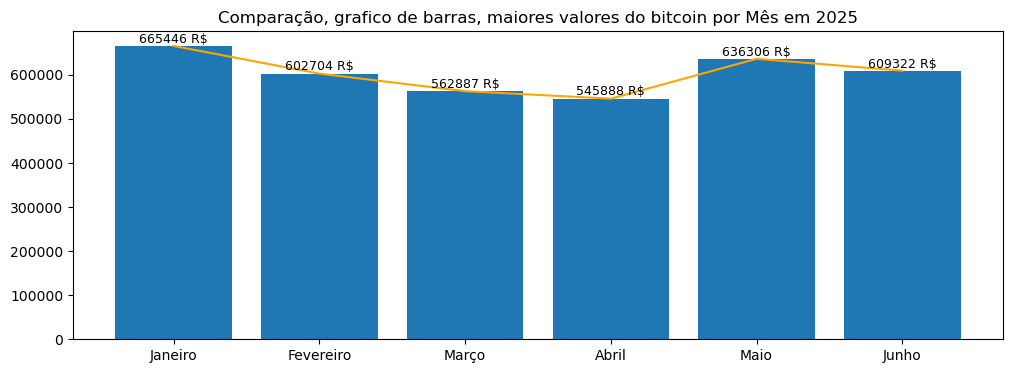

In [84]:
#Filtrando apenas o valor "high"
maiores_valores = df_grupo_meses.max().sort_values(by='timestamp')['high']


plt.figure(
    figsize=(12,4)
)

plt.title('Comparação, grafico de barras, maiores valores do bitcoin por Mês em 2025')
plt.bar(maiores_valores.index, maiores_valores)

# Adicionar os valores acima das barras
for i, valor in enumerate(maiores_valores):
    plt.text(i, valor + 500, f'{valor:.0f} R$', ha='center', va='bottom', fontsize=9)

plt.plot(maiores_valores, color='orange')

plt.savefig('post18.png')

In [58]:
maiores_valores

month
Janeiro      665446.0
Fevereiro    602704.0
Março        562887.0
Abril        545888.0
Maio         636306.0
Junho        609322.0
Name: high, dtype: float64